In [3]:
import numpy as np
import torch
import torch.nn as nn

seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

## 퍼셉트론

### 코드 3-1 파이토치로 구현한 퍼셉트론

In [4]:
class Perceptron(nn.Module):
    """
    퍼셉트론은 하나의 선형 층입니다
    """
    
    def __init__(self, input_dim):
        """
        매개변수:
            input_dim (int): 입력 특성의 크기
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """퍼셉트론의 정방향 계산
        
        매개변수:
            x_in (torch.Tensor): 입력 데이터 텐서
                x_in.shape는 (batch, num_features)입니다.
        반환값:
            결과 텐서. tensor.shape는 (batch,)입니다.
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

## 활성화 함수(Activation function)

### 코드 3-2 시그모이드(sigmoid) 활성화 함수

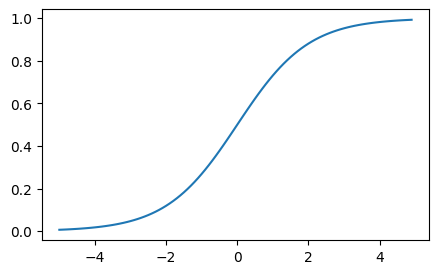

In [8]:
import torch
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,3)

x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### 코드 3-3 하이퍼볼릭 탄젠트(tanh) 활성화 함수

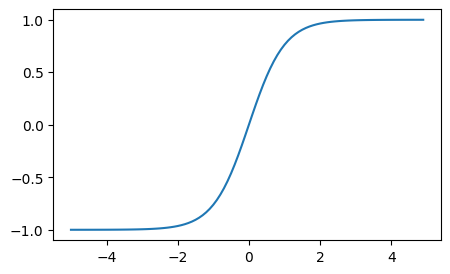

In [9]:
x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### 코드 3-4 Relu 활성화 함수

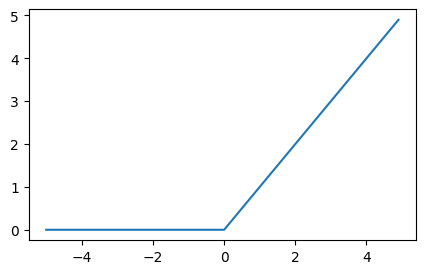

In [11]:
relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### 코드 3-5 PRelu 활성화 함수

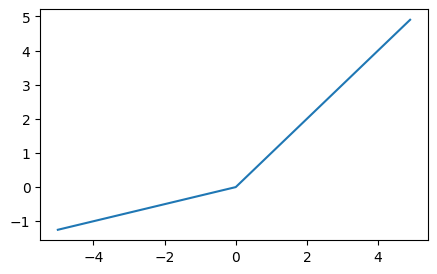

In [12]:
prelu = nn.PReLU(num_parameters=1)
x = torch.arange(-5., 5., 0.1)
y = prelu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### 코드 3-6 소프트맥스(softmax) 활성화 함수

In [13]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[-2.0260, -2.0655, -1.2054]])
tensor([[0.2362, 0.2271, 0.5367]])
tensor([1.])


## 손실함수 (loss function)

### 코드 3-7 평균 제곱 오차(MSE) 손실

In [17]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
loss.backward()
print(loss)

tensor(2.9644, grad_fn=<MseLossBackward0>)


### 코드 3-8 Cross Entropy 손실

In [18]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
loss.backward()
print (loss)

tensor(1.3020, grad_fn=<NllLossBackward0>)


### 코드 3-9 이진(binary) cross entropy 손실

In [19]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
print(probabilities)

targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
loss.backward()
print(loss)

tensor([[0.6085],
        [0.7063],
        [0.8450],
        [0.6125]], grad_fn=<SigmoidBackward0>)
tensor(0.7097, grad_fn=<BinaryCrossEntropyBackward0>)


## 